In [138]:
import matplotlib.pyplot as plt

In [139]:
file1 = open("small_int_logs/log_1.2.txt", "r")
file2 = open("small_int_logs/log_2.2.txt", "r")
file3 = open("small_int_logs/log_3.2.txt", "r")

files = []
files.append(file1)
files.append(file2)
files.append(file3)



In [140]:
lines = []
rates = []

rcmsg_lines = []

for file in files:
    list_doct = []
    rcmsg_line = []
    for line in file:
        line = line[:-1]
        line = line.rsplit(",")
        list_doct.append(line)
        if line[0] == "RecMsg":
            rcmsg_line.append(line)
    rcmsg_lines.append(rcmsg_line)
    rates.append(int(list_doct[1][0][-1]))
    lines.append(list_doct[2:])
    
        



In [141]:
rcmsg_lines[0]


[['RecMsg', '2023-03-08 07:57:16.617829', '0', '1'],
 ['RecMsg', '2023-03-08 07:57:17.629712', '1', '6'],
 ['RecMsg', '2023-03-08 07:57:17.966859', '1', '7'],
 ['RecMsg', '2023-03-08 07:57:18.305568', '0', '8'],
 ['RecMsg', '2023-03-08 07:57:18.644646', '1', '11'],
 ['RecMsg', '2023-03-08 07:57:18.984084', '2', '13'],
 ['RecMsg', '2023-03-08 07:57:19.325829', '1', '14'],
 ['RecMsg', '2023-03-08 07:57:19.664582', '2', '16'],
 ['RecMsg', '2023-03-08 07:57:20.001251', '1', '17'],
 ['RecMsg', '2023-03-08 07:57:20.336048', '1', '19'],
 ['RecMsg', '2023-03-08 07:57:20.675057', '1', '20'],
 ['RecMsg', '2023-03-08 07:57:21.012273', '1', '23'],
 ['RecMsg', '2023-03-08 07:57:21.350965', '1', '24'],
 ['RecMsg', '2023-03-08 07:57:21.687470', '0', '25'],
 ['RecMsg', '2023-03-08 07:57:22.361824', '0', '29'],
 ['RecMsg', '2023-03-08 07:57:22.700472', '0', '30'],
 ['RecMsg', '2023-03-08 07:57:25.739813', '0', '46'],
 ['RecMsg', '2023-03-08 07:57:27.432613', '0', '54'],
 ['RecMsg', '2023-03-08 07:57:27

In [142]:
rates

[3, 5, 1]

In [143]:
file1.close()
file2.close()
file3.close()

In [144]:
log_clocks = []
times = []

for el in lines:
    clock = []
    time = []
    for line in el:
        clock.append(int(line[-1]))
        time.append(line[1])
    log_clocks.append(clock)    
    times.append(time)
    


In [145]:
print(times[0])

['2023-03-08 07:57:16.617829', '2023-03-08 07:57:16.952436', '2023-03-08 07:57:17.291161', '2023-03-08 07:57:17.629712', '2023-03-08 07:57:17.966859', '2023-03-08 07:57:18.305568', '2023-03-08 07:57:18.644646', '2023-03-08 07:57:18.984084', '2023-03-08 07:57:19.325829', '2023-03-08 07:57:19.664582', '2023-03-08 07:57:20.001251', '2023-03-08 07:57:20.336048', '2023-03-08 07:57:20.675057', '2023-03-08 07:57:21.012273', '2023-03-08 07:57:21.350965', '2023-03-08 07:57:21.687470', '2023-03-08 07:57:22.023139', '2023-03-08 07:57:22.361824', '2023-03-08 07:57:22.700472', '2023-03-08 07:57:23.039529', '2023-03-08 07:57:23.378826', '2023-03-08 07:57:23.717821', '2023-03-08 07:57:24.052298', '2023-03-08 07:57:24.391702', '2023-03-08 07:57:24.728490', '2023-03-08 07:57:25.067134', '2023-03-08 07:57:25.405344', '2023-03-08 07:57:25.739813', '2023-03-08 07:57:26.076917', '2023-03-08 07:57:26.415993', '2023-03-08 07:57:26.754406', '2023-03-08 07:57:27.093341', '2023-03-08 07:57:27.432613', '2023-03-

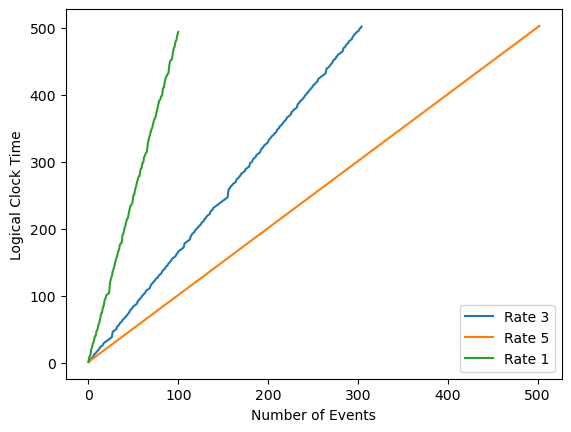

In [146]:
plt.plot([i for i in range(0, len(log_clocks[0]))], log_clocks[0])
plt.plot([i for i in range(0, len(log_clocks[1]))], log_clocks[1])
plt.plot([i for i in range(0, len(log_clocks[2]))], log_clocks[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Number of Events")
plt.ylabel("Logical Clock Time")
plt.show()

In [147]:
gaps = []
for clock in log_clocks:
    gap = [0]
    for i in range(1, len(clock)):
        gap.append(clock[i] - clock[i-1])
    gaps.append(gap)
    
    

In [148]:
from datetime import datetime
import time

rt_elap = []
for clock in times:
    gap = []
    for i in range(0, len(clock)):
        splt = clock[i].rsplit(" ")
        gap.append((datetime.strptime(clock[i], '%Y-%m-%d %H:%M:%S.%f') - datetime.strptime(clock[0], '%Y-%m-%d %H:%M:%S.%f')).total_seconds())
    rt_elap.append(gap)
    
    

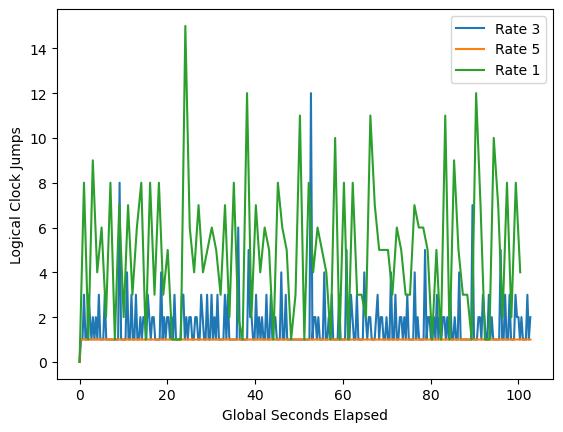

In [149]:
plt.plot(rt_elap[0], gaps[0])
plt.plot(rt_elap[1], gaps[1])
plt.plot(rt_elap[2], gaps[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Global Seconds Elapsed")
plt.ylabel("Logical Clock Jumps")
plt.show()

In [150]:
rt_elap

[[0.0,
  0.334607,
  0.673332,
  1.011883,
  1.34903,
  1.687739,
  2.026817,
  2.366255,
  2.708,
  3.046753,
  3.383422,
  3.718219,
  4.057228,
  4.394444,
  4.733136,
  5.069641,
  5.40531,
  5.743995,
  6.082643,
  6.4217,
  6.760997,
  7.099992,
  7.434469,
  7.773873,
  8.110661,
  8.449305,
  8.787515,
  9.121984,
  9.459088,
  9.798164,
  10.136577,
  10.475512,
  10.814784,
  11.153505,
  11.490826,
  11.826544,
  12.165147,
  12.504374,
  12.840566,
  13.179619,
  13.518886,
  13.858196,
  14.195338,
  14.534569,
  14.873993,
  15.211047,
  15.550228,
  15.88726,
  16.226071,
  16.565184,
  16.899853,
  17.238628,
  17.577842,
  17.915063,
  18.254395,
  18.593631,
  18.928755,
  19.267643,
  19.606886,
  19.945692,
  20.284745,
  20.619953,
  20.955908,
  21.295127,
  21.634441,
  21.969778,
  22.308794,
  22.646274,
  22.98605,
  23.324323,
  23.661523,
  24.000599,
  24.338761,
  24.674385,
  25.011083,
  25.350171,
  25.685454,
  26.024369,
  26.363435,
  26.702613,
  27

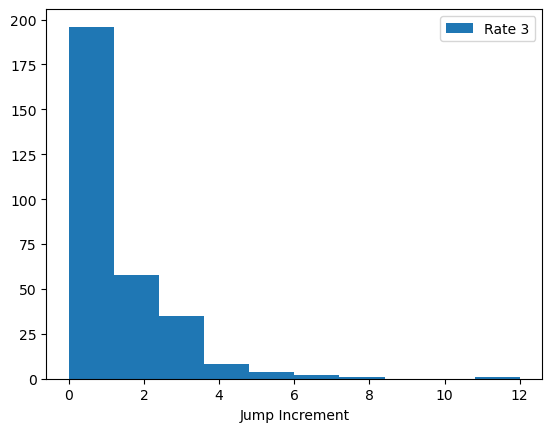

In [151]:
plt.hist(gaps[0])
plt.legend(["Rate " + str(rates[0])])
plt.xlabel("Jump Increment")
plt.show()

In [152]:
drifts = []

for i in range(0, 3):
    drift = []
    gtime = rt_elap[i]
    log_clock_time = log_clocks[i]
    for j in range(0, len(gtime)):
        drift.append((log_clock_time[j])*1/rates[i] - gtime[j])
    drifts.append(drift)

In [153]:
drifts

[[0.3333333333333333,
  0.33205966666666664,
  0.32666799999999996,
  0.9881169999999999,
  0.9843033333333335,
  0.9789276666666664,
  1.6398496666666666,
  1.9670783333333328,
  1.9586666666666668,
  2.286580333333333,
  2.283244666666667,
  2.615114333333333,
  2.6094386666666667,
  3.272222666666667,
  3.266864,
  3.263692333333334,
  3.261356666666666,
  3.922671666666666,
  3.917357,
  3.9116333333333335,
  3.9056696666666664,
  3.9000079999999997,
  3.898864333333334,
  3.892793666666666,
  3.8893389999999997,
  3.884028333333333,
  3.879151666666665,
  6.2113493333333345,
  6.207578666666667,
  6.201836,
  6.196756333333331,
  6.191154666666668,
  7.1852160000000005,
  7.179828333333333,
  7.175840666666668,
  7.840122666666668,
  7.834853000000001,
  7.828959333333332,
  8.492767333333331,
  8.487047666666667,
  8.481114,
  8.808470666666668,
  8.804662,
  9.132097666666668,
  9.459340333333332,
  9.455619666666667,
  10.116438666666667,
  10.446073333333333,
  10.440595666666

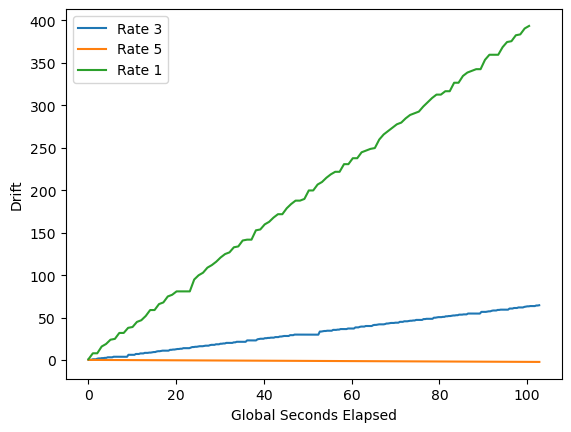

In [154]:
plt.plot(rt_elap[0], drifts[0])
plt.plot(rt_elap[1], drifts[1])
plt.plot(rt_elap[2], drifts[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Global Seconds Elapsed")
plt.ylabel("Drift")
plt.show()

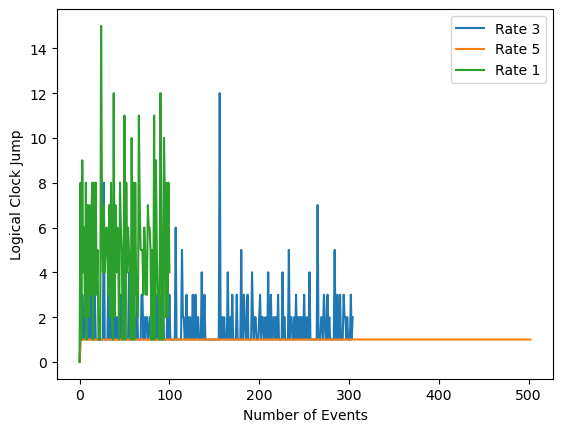

In [155]:
plt.plot([i for i in range(0, len(gaps[0]))], gaps[0])
plt.plot([i for i in range(0, len(gaps[1]))], gaps[1])
plt.plot([i for i in range(0, len(gaps[2]))], gaps[2])
plt.legend(["Rate " + str(rates[0]), "Rate " + str(rates[1]), "Rate "+str(rates[2])])
plt.xlabel("Number of Events")
plt.ylabel("Logical Clock Jump")
plt.show()